<a href="https://colab.research.google.com/github/satya-p01/50_startups/blob/main/50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning May Minor Project

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sklearn

In [ ]:
!wget https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv

--2022-06-20 15:38:02--  https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [text/plain]
Saving to: ‘50_Startups.csv’

50_Startups.csv     100%[===================>]   2.38K  --.-KB/s    in 0s      

2022-06-20 15:38:03 (29.5 MB/s) - ‘50_Startups.csv’ saved [2436/2436]



In [ ]:
ls

50_Startups.csv  sample_data/


In [ ]:
input_file= '50_Startups.csv'
dataset=pd.read_csv(input_file)
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.index
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(50, 5)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


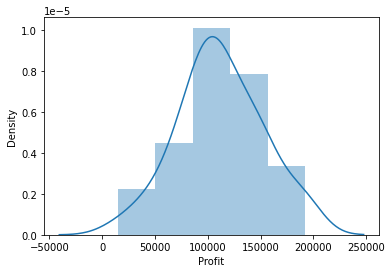

In [ ]:
#Histogram on profit
sns.distplot(dataset['Profit'],bins=5,kde=True)

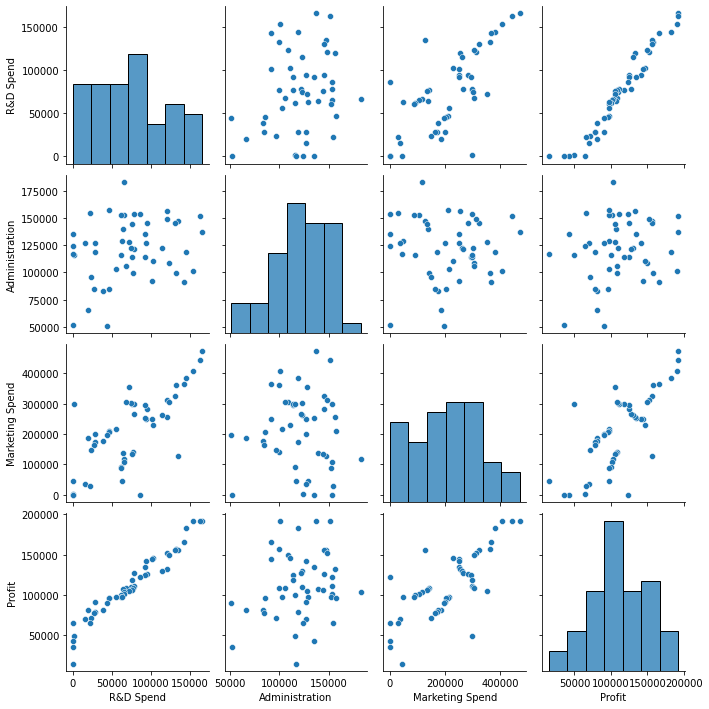

In [ ]:
#Correlation  chart on different variables for comparision
sns.pairplot(dataset)

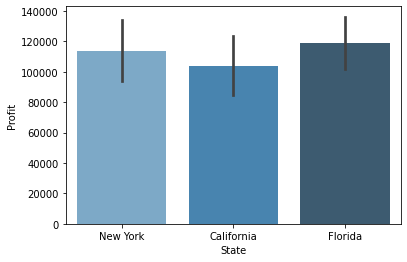

In [ ]:
# profit split in State level
sns.barplot(x='State',y='Profit',data=dataset, palette="Blues_d")

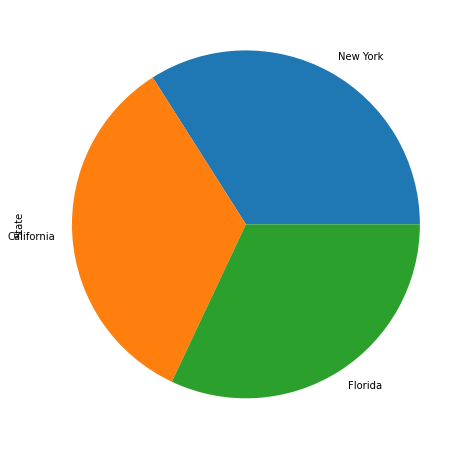

In [ ]:
dataset['State'].value_counts().plot(kind='pie')

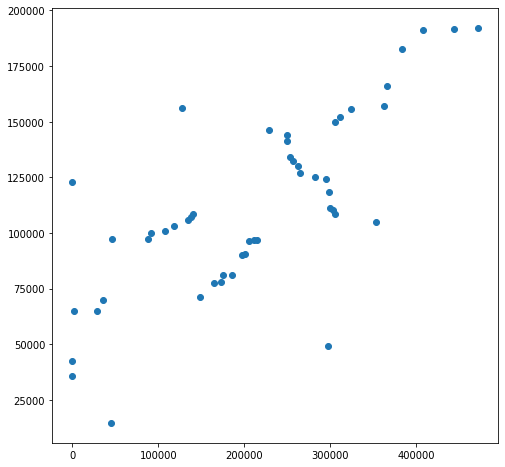

In [ ]:
profit1=dataset['Profit']
Marketing1= dataset['Marketing Spend']
plt.scatter(Marketing1,profit1)

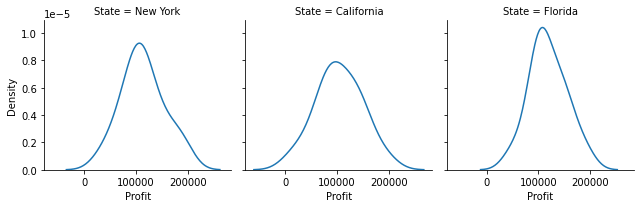

In [ ]:
# spread of profit against state
g=sns.FacetGrid(dataset, col='State')
g=g.map(sns.kdeplot,'Profit')

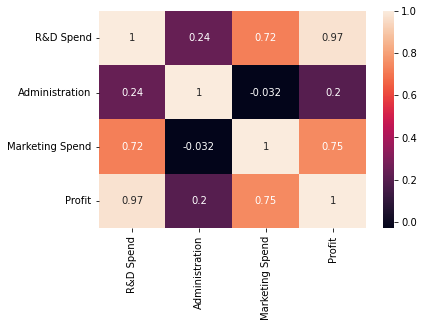

In [ ]:
#gives positive & negative relation between categories
sns.heatmap(dataset.corr(), annot=True)

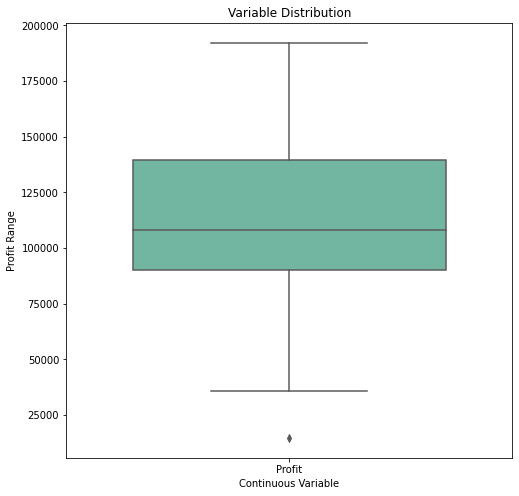

In [ ]:
profit = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[profit], orient="v", palette="Set2" , width=0.7)
plt.title("Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

In [ ]:
# Avoiding the Dummy Variable
X = X[:, 1:]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 64664.71, 139553.16, 137962.62],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})      #comparing test set with predicted values
df

,Real Values,Predicted Values
0,103282.38,104282.764722
1,144259.40,132536.884992
2,146121.95,133910.850078
3,77798.83,72584.774894
4,191050.39,179920.927619
5,105008.31,114549.310792
6,81229.06,66444.432613
7,97483.56,98404.968401
8,110352.25,114499.828086
9,166187.94,169367.506399
